# **Bellabeat Case Study Using R**
### **By: Nathan Moore**


# **Business Task**

Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. Then, identify potential opportunities and trends for Bellabeat to incorporate in their devices and marketing strategies.

**Questions to consider:**

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

**Sources Used for Analysis:**

The data I used for this case study was called the **FitBit Fitness Tracker Data**. It is a public dataset that can be found on Kaggle from the user Mobius. This Kaggle dataset contains personal fitness tracker infromation from thirty FitBit users. The data source collected information on physical activity, steps, heart rate, and sleep monitoring. This data can be very useful to Bellabeat because the company is a competitor of FitBit.

# **Upload data**

First load the necessary packages and libraries.

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




**Import datasets into R:**

While importing the files, I will give each dataset a name that describes the data inside. 

In [2]:
activity <- read.csv("../input/fitbit-tracker-data/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit-tracker-data/hourlyCalories_merged.csv")
intensities <- read.csv("../input/fitbit-tracker-data/hourlyIntensities_merged.csv")
steps <- read.csv("../input/fitbit-tracker-data/hourlySteps_merged.csv")
heartrate <- read.csv("../input/fitbit-tracker-data/heartrate_seconds_merged.csv")
weight <- read.csv("../input/fitbit-tracker-data/weightLogInfo_merged.csv")
sleep <- read.csv("../input/fitbit-tracker-data/sleepDay_merged.csv")

# **Clean and Prepare the Data**

First, I viewed all the datasets to get a good understanding of what each file entailed. For example, I will view the activity dataset next.

In [3]:
View(activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


While previewing the data, I noticed that the time measures were not uniform across all the files. I will now clean and standardize the time stamps across all the files, so that it does not become an issue while filtering, sorting, and analyzing the data in later steps.

**Fixing the time formatting:**

I will convert the time to the **datetime** format. Plus, I will create separate columns for the Date and Time for analysis purposes.

In [4]:
# Changing the time stamp for activity
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")

# Changing the time stamp for intensities
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")

# Changing the time stamp for calories
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")

# Changing the time stamp for sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

#Changing the time stamp for heartrate
heartrate$Time=as.POSIXct(heartrate$Time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
heartrate$time <- format(heartrate$Time, format = "%H:%M:%S")
heartrate$date <- format(heartrate$Time, format = "%m/%d/%y")

#Changing the time stamp for steps
steps$ActivityHour=as.POSIXct(steps$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
steps$time <- format(steps$ActivityHour, format = "%H:%M:%S")
steps$date <- format(steps$ActivityHour, format = "%m/%d/%y")

#Changing the time stamp for weight
weight$Date=as.POSIXct(weight$Date, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
weight$time <- format(weight$Date, format = "%H:%M:%S")
weight$date <- format(weight$Date, format = "%m/%d/%y")

Now, I am ready for further exploration.

# **Summary Data Statistics**

**Number of participants in each dataset:**

On Kaggle, it says that there were 30 participants for this data collection study. I want to see if each dataset includes 30 participants.

In [5]:
n_distinct(intensities$Id)
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(sleep$Id)
n_distinct(steps$Id)
n_distinct(heartrate$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 33

[1] 14

[1] 8

I will **not** be including the **heartrate** or **weight** datasets in my analysis because there were **too few participants** to conclude any significant trends in the data. Plus, the weight dataset did not have the full monthly data for the eight participants, and the dataset was littered with null values. 

**Create summaries and drop null values for the datasets:**

In [6]:
#total activity summary statistics
activity %>%
  drop_na() %>%
  select(TotalSteps,
         TotalDistance,
         Calories) %>%
  summary()

# activity summary statistics for distance and minutes
activity %>%
  drop_na() %>%
  select(VeryActiveMinutes, LightlyActiveMinutes,SedentaryMinutes,
         VeryActiveDistance,LightActiveDistance) %>%
  summary()

#intensities summary statistics
intensities %>%
  drop_na() %>%
  select(TotalIntensity) %>%
  summary()

#calories summary statistics
calories %>%
  drop_na() %>%
  select(Calories) %>%
  summary()

#sleep summary statistics
sleep %>%
  drop_na() %>%
  select(TotalMinutesAsleep,TotalTimeInBed) %>%
  summary()

#steps summary statistics
steps %>%
  drop_na() %>%
  select(StepTotal) %>%
  summary()

#heartrate summary statistics
heartrate %>%
  drop_na() %>%
  select(Value) %>%
  summary()

#weight summary statistics
weight %>%
  drop_na() %>%
  select(WeightPounds,BMI) %>%
  summary()

   TotalSteps    TotalDistance       Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :4900  

 VeryActiveMinutes LightlyActiveMinutes SedentaryMinutes VeryActiveDistance
 Min.   :  0.00    Min.   :  0.0        Min.   :   0.0   Min.   : 0.000    
 1st Qu.:  0.00    1st Qu.:127.0        1st Qu.: 729.8   1st Qu.: 0.000    
 Median :  4.00    Median :199.0        Median :1057.5   Median : 0.210    
 Mean   : 21.16    Mean   :192.8        Mean   : 991.2   Mean   : 1.503    
 3rd Qu.: 32.00    3rd Qu.:264.0        3rd Qu.:1229.5   3rd Qu.: 2.053    
 Max.   :210.00    Max.   :518.0        Max.   :1440.0   Max.   :21.920    
 LightActiveDistance
 Min.   : 0.000     
 1st Qu.: 1.945     
 Median : 3.365     
 Mean   : 3.341     
 3rd Qu.: 4.782     
 Max.   :10.710     

 TotalIntensity  
 Min.   :  0.00  
 1st Qu.:  0.00  
 Median :  3.00  
 Mean   : 12.04  
 3rd Qu.: 16.00  
 Max.   :180.00  

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.0  
 Median :433.0      Median :463.0  
 Mean   :419.5      Mean   :458.6  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

   StepTotal      
 Min.   :    0.0  
 1st Qu.:    0.0  
 Median :   40.0  
 Mean   :  320.2  
 3rd Qu.:  357.0  
 Max.   :10554.0  

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

  WeightPounds        BMI       
 Min.   :116.0   Min.   :22.65  
 1st Qu.:126.9   1st Qu.:23.85  
 Median :137.8   Median :25.05  
 Mean   :137.8   Mean   :25.05  
 3rd Qu.:148.7   3rd Qu.:26.25  
 Max.   :159.6   Max.   :27.45  

**Conclusions from the summary data figures:**

  + The average time spent being very active was **only 21.16 minutes** per day.
  + The average time asleep per night was **seven hours**. On average, people were sleeping well during the night for a healthy day.
  + The average steps and calories burned per day were **7638** and **2304**, respectively. So, people eating a standard diet of 2300-2400 calories per day would not gain or lose weight with this current average of activity. The participants would need to consume less food/calories or perform more time exercising.

Now with these assessments, I will perform more analysis to look deeper into the data.

# **Merge datasets**

There are two datasets with very important data points that I want to merge. The **sleep** and **activity** data need to be joined to make it easier for analysis purposes. Also, it makes sense to merge these two datasets because both files have daily data records.

In [7]:
merged_sleep_data <- merge(sleep, activity, by=c('Id', 'date'))
View(merged_sleep_data)

Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,04/20/16,2016-04-20,1,360,377,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786
1503960366,04/21/16,2016-04-21,1,325,364,2016-04-21,9819,6.34,6.34,0,1.34,0.35,4.65,0,19,8,211,838,1775
1503960366,04/23/16,2016-04-23,1,361,384,2016-04-23,14371,9.04,9.04,0,2.81,0.87,5.36,0,41,21,262,732,1949


I named the new dataset, **merged_sleep_data**, and I will be using this dataset for most of my analysis.

# **Visualizations and Analysis**

**Comparing Calories and Lightly Active Minutes:**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



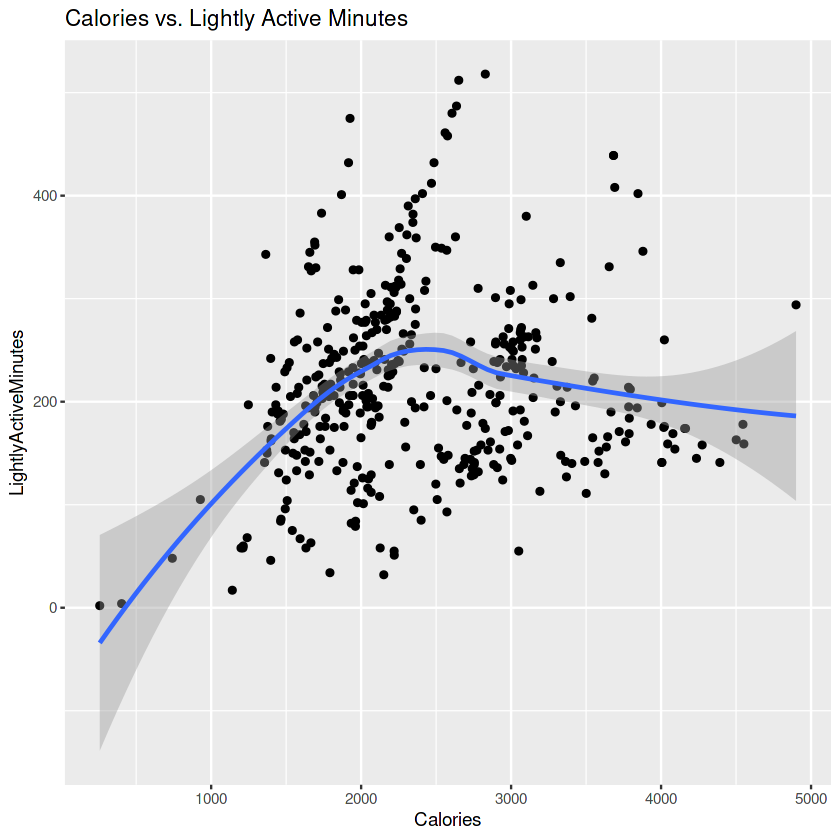

In [8]:
ggplot(data=merged_sleep_data, aes(x=Calories, y=LightlyActiveMinutes)) + 
  geom_point()+ labs(title="Calories vs. Lightly Active Minutes")+
  geom_smooth()

As you can see, the trend line shows that more lightly active minutes does not correlate to more calories burned. So, targeting lightly active minutes will not benefit Bellabeat users as much.

**Comparing Calories and Very Active Minutes:**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



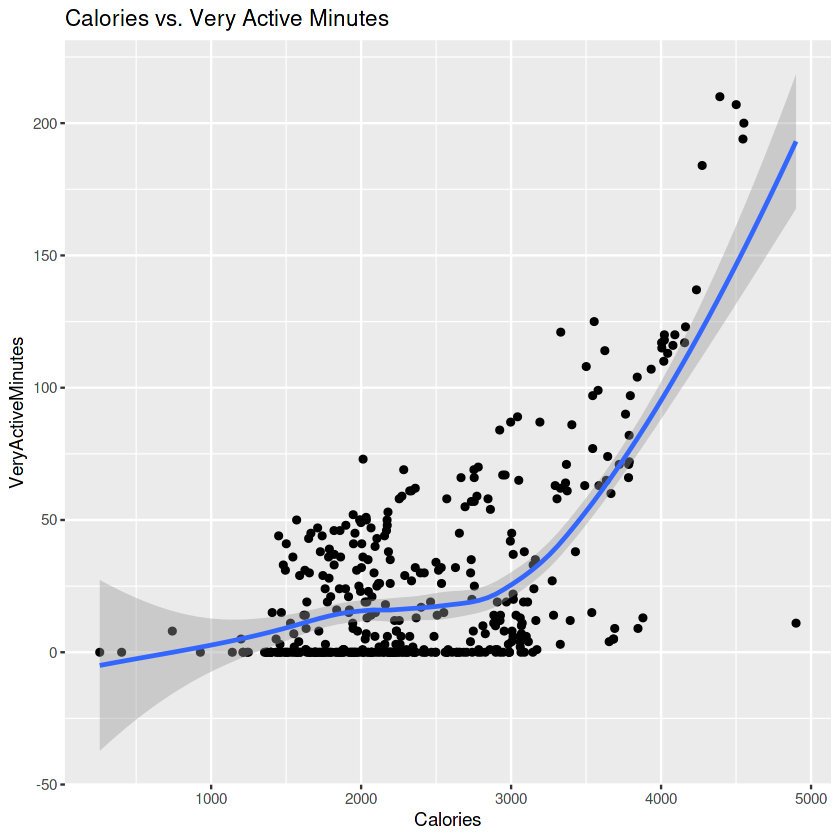

In [9]:
ggplot(data=merged_sleep_data, aes(x=Calories, y=VeryActiveMinutes)) + 
  geom_point()+ labs(title="Calories vs. Very Active Minutes")+
  geom_smooth()

This graph displays a **strong correlation** between calories burned and very active minutes. People and Bellabeat need to target very active minutes for fitness and health improvements.

Bellabeat could help Bellabeat users acheive more very active minutes by **sending motivational messages** when the device senses a high heartrate for very active minutes. These messages could help users get more very active minutes each day and help them reach their fitness goals.

**Comparing Total Minutes Asleep and Very Active Minutes:**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



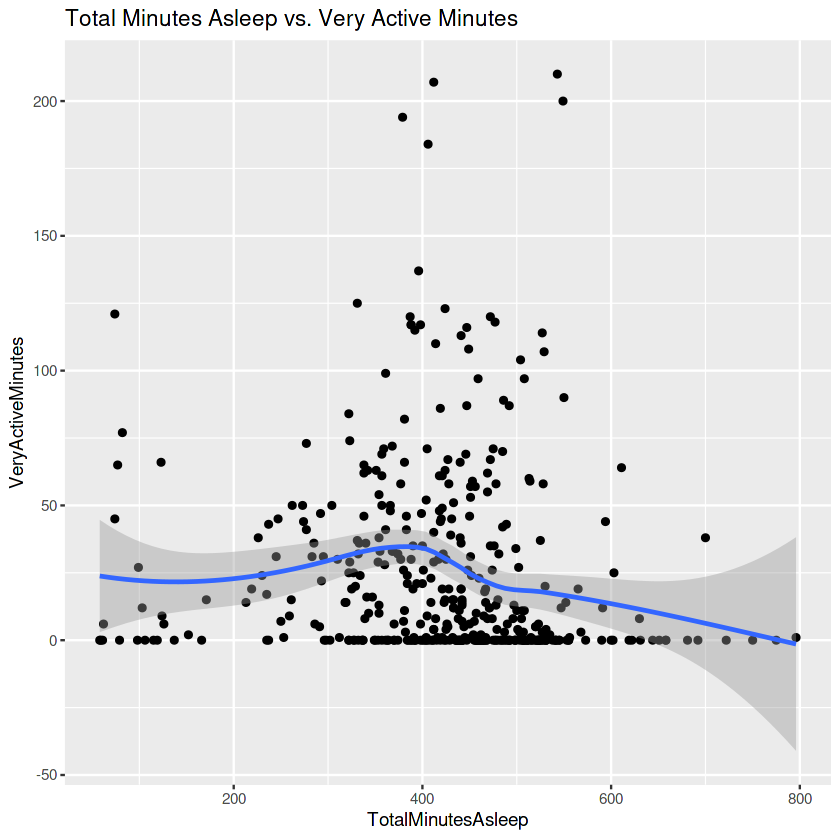

In [10]:
ggplot(data=merged_sleep_data, aes(x=TotalMinutesAsleep, y=VeryActiveMinutes)) + 
  geom_point()+ labs(title="Total Minutes Asleep vs. Very Active Minutes")+
  geom_smooth()

The trend line in this graph is not very strong, but there are a few important conclusions to address. After seven hours of sleep, the trend line begins to **decrease**, and after ten hours of sleep the trend line decreases at a slightly faster rate with very few very active data points above the trend line.

As we know, Bellabeat needs to improve a users very active minutes for the best results. **So, Bellabeat should send messages or vibrations in their device to prevent oversleeping.**

**Comparing Total Minutes Asleep and Very Active Minutes:**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


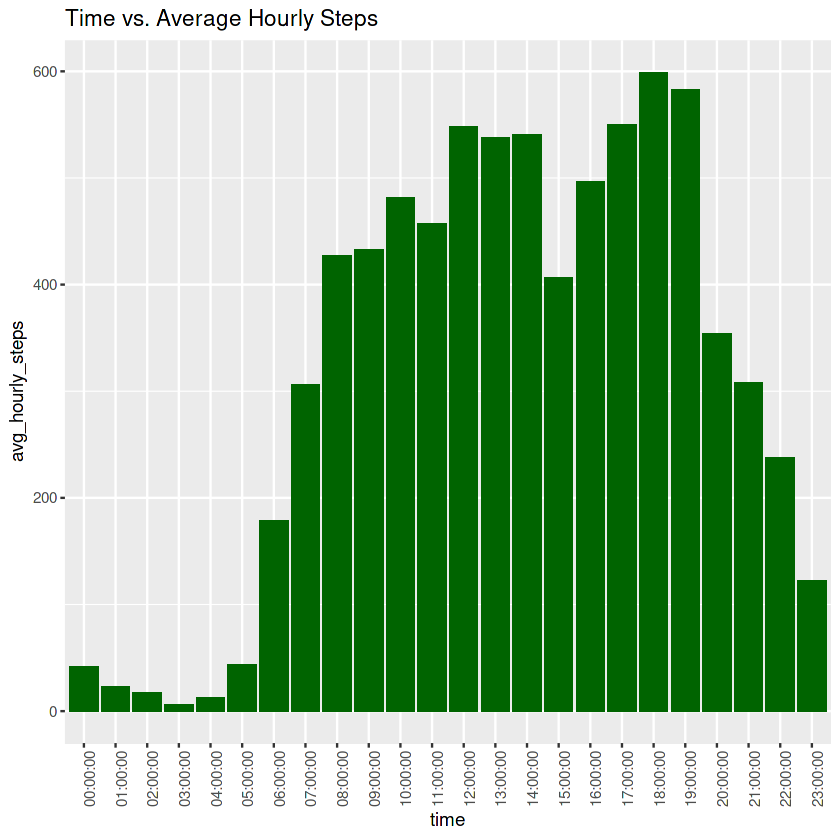

In [11]:
steps_new <- steps %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(avg_hourly_steps = mean(StepTotal))

ggplot(data=steps_new, aes(x=time, y=avg_hourly_steps)) + 
  geom_histogram(stat= "identity", fill="dark green")+
  theme(axis.text.x = element_text(angle = 90))+
  labs(title="Time vs. Average Hourly Steps")

This graph shows that people are most active between the times of **12:00-14:59** and **17:00-19:59.** During these hours, users completed over 500 steps per hour, which is far above the average hourly step count of 320. These times correlate to standard lunch and dinner times where people have breaks from work to do their own tasks and eat. **Bellabeat should focus on these times to send messages to their users about intense activities to increase their very active minutes.** Users would be more inclined to listen to these messages during these time periods because it is during their free time.

Bellabeat could send a vibration whenever the very active minute goal for the day is complete, so the user can feel accomplished.

# **Analysis Recommendations for Bellabeat**

**Target Audience:**

Bellabeat's target audience is women, **but I think they should more specifically target women with full-time work schedules, especially women in an office environment with a lot fo sedentary time.** People working full-time could always use more motivation and planning for their fitness goals because they are already tired from work. They might not want to focus on their health when their body and mind is already drained, so Bellabeat should fill this gap. Bellabeat services can easily be the personal fitness coach that a tired worker needs. Bellabeat can be schedule workouts, provide motivation, and track data for its users. Plus, the working women demographic will have more disposable income to spend on health services, like Bellabeat. So, advertising health services to working women is a large demographic that Bellabeat must monopolize.

**Main Marketing Campaign Idea:**

Bellabeat needs to be the **digital personal fitness coach** that a user can have with them at all times. Bellabeat can give tips for intense exercises, track sleep patterns, provide nutrition tips, and give motivation to accomplish fitness goals. Bellabeat will lead users to develop good fitness and health habits.

**Ideas for Marketing:**

  + Increase very active minutes by **sending motivational messages whenever devices detect a high intensity or heartrate.**
  + For competitive people, send messages that they have completed more steps than a specified percentage of users for the day or week. This could encourage them to do more exercise. Also, send them personal records to beat. **Maybe create online fitness awards for user profiles.** For example, "Most Steps this Week" and "Most Calories burned in June". These awards could be used for motivation, but also as a discount for new Bellabeat devices.
  + We want to increase very active minutes, but doing the same exercise all the time to reach this goal gets boring. **Bellabeat devices should send recommendations on what intense exercise should be completed for the day.** This gives people a variety of choices to get their very active minutes.
  + For users wanting to improve their sleep patterns, **Bellabeat should send notifications for going to bed and oversleeping.** Getting consistent sleep is necessary for productivity and fitness goals.
  + The most active time periods during the day for fitness tracker users are between **12:00-14:59** and **17:00-19:59**. Bellabeat should use this information to send notifications to users to do some exercising and provide motivation.

Based on the data collected and my analysis, I believe these key points can improve Bellabeat's services and increase their market share.

I enjoyed completing this Bellabeat Case Study. Thank you for reading!